In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as py
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import matplotlib.image as mpimg
from IPython.display import display, Image
from matplotlib.pyplot import figure
import math
%matplotlib notebook

In [387]:
df=pd.read_csv('train/7556/SimpleTest/7.csv')
df.drop([len(df)-2,len(df)-1] , inplace=True)
df

,X,Y,Pressure,TiltX,TiltY,Time
0,681.761866266313,711.937175,0.030747,-4280.0,2800.0,00:04.0932762
1,685.07957038919,713.517034,0.033433,-4280.0,2800.0,00:04.1022063
2,685.395542210417,713.885668,0.033433,-4280.0,2800.0,00:04.1181075
3,685.974823882665,714.517612,0.035386,-4280.0,2800.0,00:04.1348046
4,685.974823882665,714.517612,0.047593,-4280.0,2800.0,00:04.1503977
...,...,...,...,...,...,...
142,464.057281441275,478.118027,0.479240,-3285.0,4038.0,00:05.5095567
143,463.214689918004,477.538746,0.481193,-3285.0,4038.0,00:05.5095567
144,462.898718096778,477.380760,0.481193,-3285.0,4038.0,00:05.5251337
145,462.424760364938,477.117450,0.481193,-3255.0,4056.0,00:05.5564403


In [388]:
df.rename(columns = {'X':'X', ' Y':'Y' ,' Pressure':'Pressure' , ' TiltX':'TiltX' , ' TiltY':'TiltY' , ' Time': 'Time'}, inplace = True)

In [389]:
df['X']=df['X'].astype(float)
df['Time']=df['Time'].str.slice(3).astype(float)
df['Time_Diff'] = df['Time'].diff()

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          147 non-null    float64
 1   Y          147 non-null    float64
 2   Pressure   147 non-null    float64
 3   TiltX      147 non-null    float64
 4   TiltY      147 non-null    float64
 5   Time       147 non-null    float64
 6   Time_Diff  146 non-null    float64
dtypes: float64(7)
memory usage: 9.2 KB


In [391]:
df['X_Diff'] = df['X'].diff()
df['Y_Diff'] = df['Y'].diff()
df['Slope'] = df['Y_Diff']/df['X_Diff']

<IPython.core.display.Javascript object>


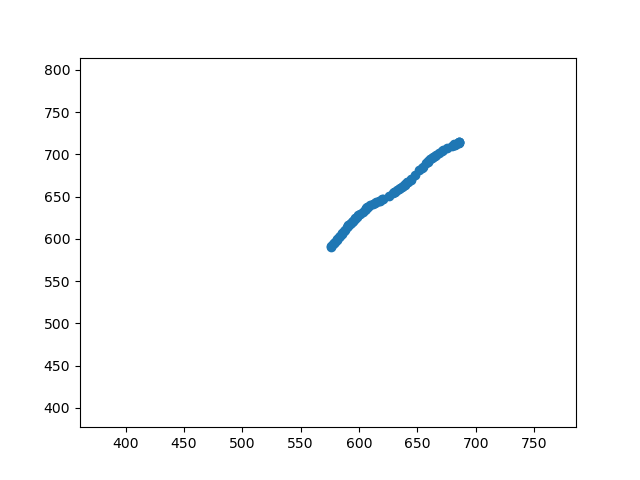

In [409]:
x = df['X']
y = df['Y']

fig = plt.figure()
plt.xlim(df['X'].min()-100 , df['X'].max() + 100)
plt.ylim(df['Y'].min()-100 , df['Y'].max() + 100)
graph, = plt.plot([], [], 'o')
graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(df), interval=10)
plt.show()

In [393]:
def line_length(dist):
    dist = np.array(dist)
    return np.sum(dist)

In [394]:
def avg_pressure(pressures):
    pressures = np.array(pressures)
    return np.average(pressures)

In [395]:
def info(dataframe):
    table = dataframe[['X','Y']].copy()
    distances = []
    pressures = []
    lines_data = []
    avg_pressure
    handlift=0
    for i in range(len(table)-1):
        distance = math.sqrt(math.pow((dataframe['X'][i]-dataframe['X'][i+1]),2)
                                   + math.pow((dataframe['Y'][i]-dataframe['Y'][i+1]),2))
        distances.append(distance)
        pressures.append(dataframe['Pressure'][i])
        if ((distance > 15) and (dataframe['Time_Diff'][i+1]-dataframe['Time_Diff'][i]>0.04)):
            lines_data.append((line_length(distances), avg_pressure(pressures)))
            distances = []
            pressures = []
        if (dataframe['Time_Diff'][i+1]-dataframe['Time_Diff'][i]>0.04):
            handlift = handlift+1
    if (distances is not(None) and pressures is not(None)):
         lines_data.append((line_length(distances), avg_pressure(pressures)))
    return handlift, lines_data, len(lines_data)

# Number of hand lifts
# Number of lines and average pressure

In [396]:
hand_lift, lines_d, num_of_lines = info(df)
print('Hand Lifts: ' + str(hand_lift) + "\nNumber Of Lines: " + str(num_of_lines))
print("Lines Length:")
print(lines_d)

Hand Lifts: 0
Number Of Lines: 1
Lines Length:
[(336.1173545977713, 0.3849819883806248)]


# We will check if the shape is closed or open:

In [397]:
index=2
while index<len(df)-1 and (df['Time_Diff'][index+1]-df['Time_Diff'][index] <=0.04):
    index = index + 1

In [398]:
sub_df = df.iloc[1:index+1].copy()
xy_sub_df = sub_df[['X','Y']].copy()
xy_sub_df

,X,Y
1,685.079570,713.517034
2,685.395542,713.885668
3,685.974824,714.517612
4,685.974824,714.517612
5,685.974824,714.517612
...,...,...
142,464.057281,478.118027
143,463.214690,477.538746
144,462.898718,477.380760
145,462.424760,477.117450


In [399]:
df_xy = df[['X','Y']].copy()
for i in range(len(df_xy)-2):
    if df_xy['X'][i] == df_xy['X'][i+1] and df_xy['Y'][i] == df_xy['Y'][i+1] :
        df_xy.drop(i , axis=0 , inplace=True)
for i in range(1,len(xy_sub_df)-2):
    if xy_sub_df['X'][i] == xy_sub_df['X'][i+1] and xy_sub_df['Y'][i] == xy_sub_df['Y'][i+1] :
        xy_sub_df.drop(i , axis=0 , inplace=True)

In [400]:
duplicates = xy_sub_df[xy_sub_df.duplicated()]
df_xy_duplicates = df_xy[df_xy.duplicated()]
df_xy_duplicates

,X,Y


In [401]:
if(len(duplicates)>0) or len(df[df[['X','Y']].duplicated()])>=4:
    print("closed")
elif len(df_xy_duplicates)>0:
    print("closed")
else:
    print("open")

open


<IPython.core.display.Javascript object>


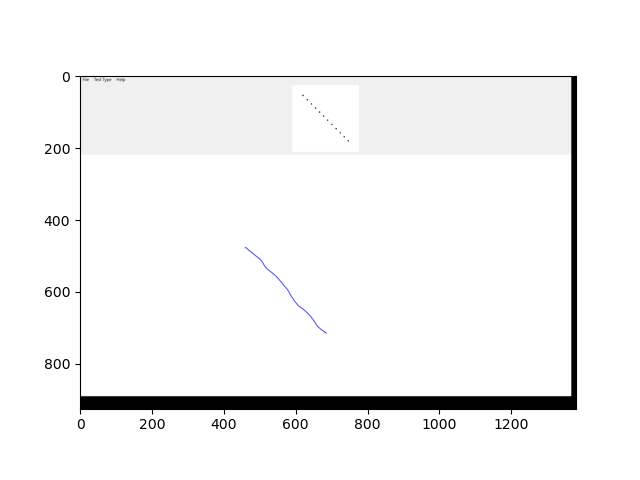

In [408]:
plt.imshow(mpimg.imread('train/7556/SimpleTest/7.png'))